In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [23]:
len(train_data)

8982

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [25]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 1s 178us/step - loss: 2.5332 - acc: 0.4945 - val_loss: 1.7265 - val_acc: 0.6110
Epoch 2/5
7982/7982 [==============================] - 1s 169us/step - loss: 1.4527 - acc: 0.6864 - val_loss: 1.3493 - val_acc: 0.7060
Epoch 3/5
7982/7982 [==============================] - 1s 173us/step - loss: 1.1003 - acc: 0.7641 - val_loss: 1.1712 - val_acc: 0.7440
Epoch 4/5
7982/7982 [==============================] - 1s 168us/step - loss: 0.8718 - acc: 0.8156 - val_loss: 1.0804 - val_acc: 0.7580
Epoch 5/5
7982/7982 [==============================] - 1s 169us/step - loss: 0.7047 - acc: 0.8470 - val_loss: 0.9840 - val_acc: 0.7830


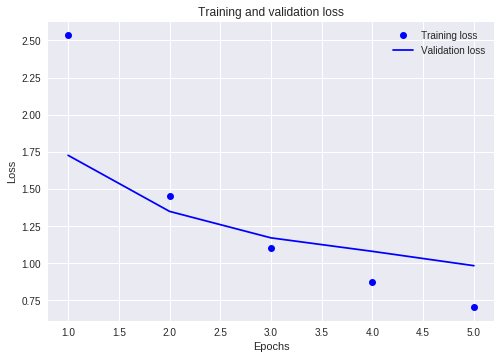

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

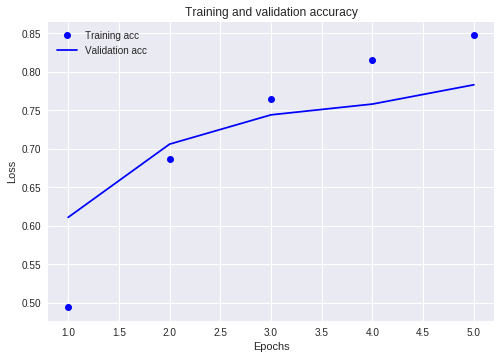

In [34]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=5,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 2s 222us/step - loss: 2.6369 - acc: 0.5064 - val_loss: 1.7451 - val_acc: 0.6360
Epoch 2/5
7982/7982 [==============================] - 1s 175us/step - loss: 1.4058 - acc: 0.7136 - val_loss: 1.2849 - val_acc: 0.7290
Epoch 3/5
7982/7982 [==============================] - 1s 172us/step - loss: 1.0419 - acc: 0.7799 - val_loss: 1.1260 - val_acc: 0.7620
Epoch 4/5
7982/7982 [==============================] - 1s 172us/step - loss: 0.8296 - acc: 0.8250 - val_loss: 1.0579 - val_acc: 0.7690
Epoch 5/5
2246/2246 [==============================] - 0s 118us/step


In [36]:
results

[1.0624147975221874, 0.7644701691896705]